In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 75

In [3]:
from argparse import ArgumentParser

parser = ArgumentParser()
parser.add_argument('--dataset', type=str, default='california')
parser.add_argument('--test_size', type=float, default=0.3)
parser.add_argument('--random_state', type=int, default=0)
parser.add_argument('--k', type=int, default=5)
args = parser.parse_known_args()[0]

<AxesSubplot:>

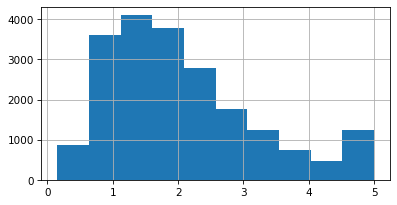

In [4]:
from sklearn.datasets import fetch_california_housing

# Load the data
dataset = fetch_california_housing(as_frame = True)
df = dataset.frame
X = dataset.data
y = dataset.target

y.hist(figsize=(6, 3))


In [5]:
# Make classification problem
y = (y > np.quantile(y, .85)).astype(int)

y.value_counts()

0    17544
1     3096
Name: MedHouseVal, dtype: int64

In [6]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=args.random_state, shuffle=True, test_size=args.test_size)

In [7]:
X_train

array([[   1.975     ,   52.        ,    2.8       , ...,    4.825     ,
          36.73      , -119.79      ],
       [   2.2604    ,   43.        ,    3.67148014, ...,    3.01805054,
          37.77      , -122.21      ],
       [   6.299     ,   17.        ,    6.47802198, ...,    3.81043956,
          33.87      , -118.04      ],
       ...,
       [   3.1977    ,   31.        ,    3.64122137, ...,    1.7913486 ,
          36.58      , -121.9       ],
       [   5.6315    ,   34.        ,    4.54059829, ...,    2.24786325,
          33.62      , -117.93      ],
       [   1.3882    ,   15.        ,    3.9295302 , ...,    3.43624161,
          32.8       , -115.56      ]])

In [6]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators = 10,
    max_depth = 3,
    random_state = args.random_state,
)
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

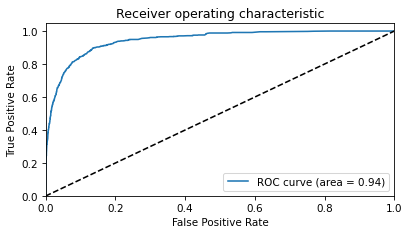

In [7]:
from sklearn.metrics import roc_curve, auc

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # print(classification_report(y, y_pred))
    # print('\nConfusion matrix:')
    # print(confusion_matrix(y, y_pred))

    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 3))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

evaluate_model(model, X_test, y_test)

# Feature Selection

In [ ]:
from ITMO_FS.filters.multivariate import MIFS


MIFS(
    selected_features = None,
)

In [2]:
import numpy as np
from scipy.stats import entropy, differential_entropy

X = np.random.RandomState(1).normal(size = (100000, 2))
differential_entropy(X)

array([1.42094791, 1.4150386 ])

In [3]:
from sklearn.metrics.cluster import contingency_matrix

contingency_matrix([1,2,3,3,2,2,2], [1,1,1,3,2,2,2])

array([[1, 0, 0],
       [1, 3, 0],
       [1, 0, 1]])

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix([1,2,3,3,2,2,2], [1,1,1,3,2,2,2])


array([[1, 0, 0],
       [1, 3, 0],
       [1, 0, 1]])

In [7]:
import numpy as np
np.nonzero()
np.nonzero([
    [0,1,2],
    [2,3,0],
])

(array([0, 0, 1, 1]), array([1, 2, 0, 1]))

In [11]:
np.unique([0,0,0,2,5,1,1], return_inverse=True)

(array([0, 1, 2, 5]), array([0, 0, 0, 2, 3, 1, 1]))

In [31]:
c = contingency_hypercube(np.random.randint(0, 5, size=(1000,3)), sparse=True)

In [33]:
c.todense()

array([[[ 7, 10,  6,  7, 11],
        [ 7,  9, 10,  2,  4],
        [10, 11,  8, 12,  6],
        [ 4,  7,  9,  8,  7],
        [ 6,  5,  5, 11, 12]],

       [[11,  8,  5,  8, 10],
        [ 7,  7,  8,  8, 14],
        [ 8,  3,  6,  7,  4],
        [ 8,  6,  8,  3, 12],
        [11,  9,  5,  5, 12]],

       [[12, 13, 14,  5,  7],
        [10, 11,  4,  9, 10],
        [10, 10,  8,  7,  8],
        [ 9,  5, 10, 10,  5],
        [12, 11,  6,  4,  7]],

       [[ 7, 15, 10,  7,  3],
        [10,  2,  9,  5, 14],
        [ 5,  8,  8,  8,  6],
        [ 3,  6, 12,  8, 11],
        [ 6,  9,  8,  6,  6]],

       [[10,  4,  5, 14, 11],
        [ 7, 10,  7,  8,  9],
        [ 7,  9, 10,  9,  6],
        [ 5,  4, 13,  7,  4],
        [11,  9,  9,  9,  7]]])

In [35]:
c.sum(axis=0).todense()

array([[47, 50, 40, 41, 42],
       [41, 39, 38, 32, 51],
       [40, 41, 40, 43, 30],
       [29, 28, 52, 36, 39],
       [46, 43, 33, 35, 44]])

In [36]:
np.nonzero(c)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
        4, 4, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3,
        3, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]),
 array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
  

In [43]:
np.ravel(c.sum(axis = (0, 1)).todense())

TypeError: no implementation found for 'numpy.ravel' on types that implement __array_function__: [<class 'sparse._coo.core.COO'>]

In [17]:
import scipy as sp


sp.sparse.coo_matrix((np.ones(4), ([0,0,0,1], [1,3,3,5])), shape=(2,6)).toarray()

array([[0., 1., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [12]:
import numpy as np
import sparse

coo = sparse.COO((np.ones(5), ([0,0,0,1,1], [1,3,3,5,5], [1,0,2,3,3])), shape=(2,6,6))

In [1]:
from utils.feature_selection.filter.multivariate._cmi import conditional_mutual_info_score


conditional_mutual_info_score([0,0,0,1,1], [1,3,3,5,5], [1,0,2,3,3], x_discrete=)

TypeError: _compute_cmi() missing 3 required positional arguments: 'x_discrete', 'y_discrete', and 'z_discrete'